# Toxic Comment Classification Challenge

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
from __future__ import absolute_import

In [3]:
train = pd.read_csv('train.csv',index_col=False)
test = pd.read_csv('test.csv',index_col=False)
print('Length of trainning {}'.format(len(train)))
print('Length of test {}'.format(len(test)))

Length of trainning 159571
Length of test 153164


In [4]:
train.tail(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [5]:
#pd.isnull(data).sum().sort_values(ascending=False).head(10)

Labels 

In [6]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
#y_train_array = train[list_classes].values

### EDA: create two new features

In [7]:
# add a new column; the total num of the types of toxicity
train['genres'] = train[list_classes].sum(axis=1)
# create a new feature Text Length
train['length_text'] = train['comment_text'].str.split().apply(len)

In [8]:
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,genres,length_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,17


Categories per Comment

Text(0.5,0,'# of categories')

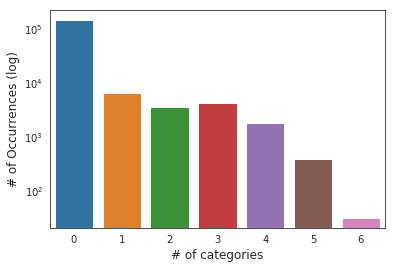

In [9]:
g=sns.countplot(train['genres'])
g.set_yscale('log')
g.set_ylabel('# of Occurrences (log)', fontsize=12)
g.set_xlabel('# of categories', fontsize=12)

Unbalanced data, most of the comments do not have any toxicity. 

In [10]:
print('clean comments',(train['genres'] == 0).sum())
print('toxic comments',(train['genres'] != 0).sum())

clean comments 143346
toxic comments 16225


<BarContainer object of 6 artists>

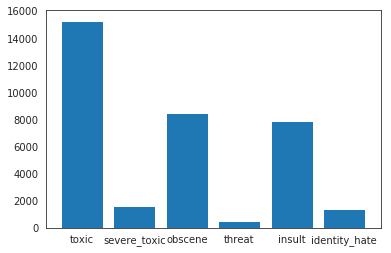

In [11]:
class_stat=pd.DataFrame(train[list_classes].sum(axis=0),columns=['number'])
plt.bar(class_stat.index,class_stat['number'])

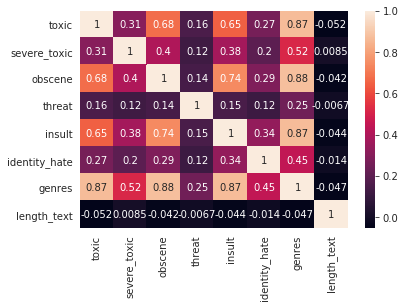

In [12]:
train_nms=train[["toxic", "severe_toxic", "obscene", "threat", "insult", \
                 "identity_hate",'genres','length_text']]

sns.heatmap(train_nms.corr(),annot=True)

In [13]:
#Crosstab
main_col="toxic"
corr_mats=[]
for col in list_classes:
    confusion_matrix = pd.crosstab(train[main_col], train[col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=train.columns[2:])
out

toxic        severe_toxic       obscene        threat       insult  \
toxic       0      1            0     1       0     1       0    1       0   
toxic                                                                        
0      144277      0       144277     0  143754   523  144248   29  143744   
1           0  15294        13699  1595    7368  7926   14845  449    7950   

            identity_hate        
toxic     1             0     1  
toxic                            
0       533        144174   103  
1      7344         13992  1302

Text Length

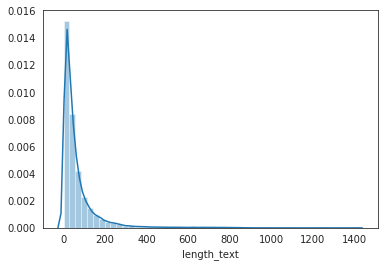

In [14]:
sns.distplot((train['length_text']))

In [15]:
# combine train and test data 
#text=pd.concat([train['comment_text'],test['comment_text']], axis=0,sort=False).reset_index(drop=True) 
# combine training and test 
#print('Total Data Shape',text.shape)

Now look at some examples

In [16]:
# examples
for col in list_classes:
    print(col+':')
    print(' ')
    print(train[train[col]==1]['comment_text'].iloc[3])
    print('='*50)

toxic:
 
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!
severe_toxic:
 
Hi 

Im a fucking bitch.

50.180.208.181
obscene:
 
GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!
threat:
 
Fuck you, Smith. Please have me notified when you die. I want to dance on your grave.
insult:
 
Stupid peace of shit stop deleting my stuff

### Text Data Tokenization and Normalization

In [9]:
import string
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize,MWETokenizer 

stemmer=PorterStemmer() #
lemma=WordNetLemmatizer() # worked the same way as tonized 
#tokenizer = MWETokenizer()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    #nopunc = ([char for char in mess.lower() \
    #           if char not in string.punctuation and not char.isdigit()])
    word=nltk.word_tokenize(mess)
    #print(word)
    #nopunc = ''.join(nopunc)
    new_word=[w for w in word if w not in stopwords_en and w.isalpha()]
    new_word=[lemma.lemmatize(w, "v") for w in new_word]
    #new_word=[stemmer.stem(w) for w in new_word]
    return new_word 


def word_freq(s):
    txt = s.str.lower().str.replace(r'\W+', ' ').str.cat(sep=' ')  
    words = text_process(txt)
    words_dist = nltk.FreqDist(w for w in words) 
    return words_dist

In [6]:
print('Let\'s look at an example before and after tokenization and normalization')
print('='*50)
print(train['comment_text'][100])
print('cleaned text')
print('='*50)
print(text_process(train['comment_text'][100]))

Let's look at an example before and after tokenization and normalization
However, the Moonlite edit noted by golden daph was me (on optus ...)  Wake up wikkis.  So funny
cleaned text
['However', 'Moonlite', 'edit', 'note', 'golden', 'daph', 'optus', 'Wake', 'wikkis', 'So', 'funny']


Build WordCloud for 1) No Toxic Comments 2) Toxic Comments

In [19]:
clean_comments=train[train['genres'] == 0]['comment_text']
toxic_comments=train[train['genres'] != 0]['comment_text']

In [48]:
words_dist=word_freq(clean_comments)  # review 

In [39]:
from wordcloud import WordCloud
import matplotlib as mpl
def plot_cloud(words_dist,size):
    mpl.rcParams['figure.figsize'] = (10.0, 10.0)
    mpl.rcParams['font.size'] = 12
    mpl.rcParams['savefig.dpi'] = 300
    mpl.rcParams['figure.subplot.bottom'] = .1
    
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black').generate_from_frequencies(words_dist)
    
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    #plt.title(title, fontsize=50, color='y')
    plt.tight_layout()
   # plt.savefig('{}.png'.format(title), format='png', dpi=300)
    plt.show()

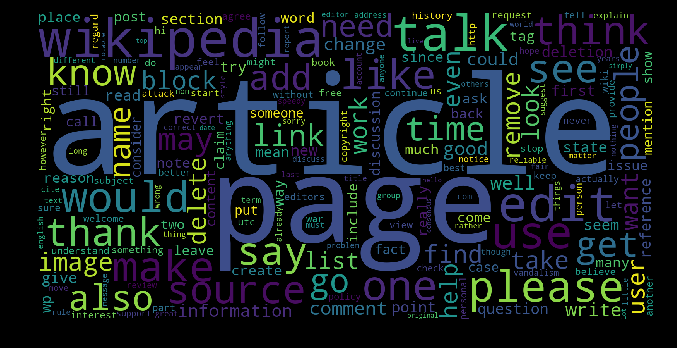

In [40]:
plot_cloud(words_dist,size = (15,5))

Toxic Comments

In [42]:
words_dist=word_freq(toxic_comments)

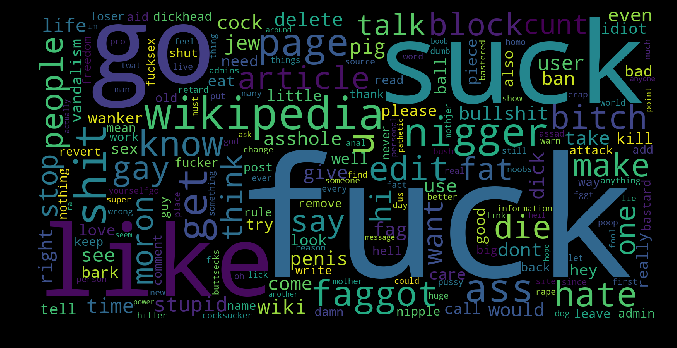

In [44]:
plot_cloud(words_dist,size = (15,5))

In [45]:
# spelling check 
#from nltk.corpus import words
#correct_spellings = words.words()
#one = [(nltk.jaccard_distance(set(nltk.ngrams(entries[0], n=4)), \
#                                  set(nltk.ngrams(a, n=4))), a) for a in c]

### Data Preprocessing
 Tried CountVectorizer and TfidfVectorizer

In [10]:
# split the dataset for train and cross-validation 
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train['comment_text'], \
                                                train[list_classes],test_size=0.1,random_state=101)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#vect = CountVectorizer(ngram_range=(1,1),token_pattern=r'\b[^\d\W]+\b',
#               min_df=5,stop_words=stopwords_en,max_features = 15000)# convert to matrix

In [12]:
vect = TfidfVectorizer(ngram_range=(1,1),token_pattern=r'\b[^\d\W]+\b',
               min_df=5,stop_words=stopwords_en, max_features = 20000)

In [13]:
X_train_vector = vect.fit_transform(X_train)
X_cv_vector = vect.transform(X_cv)

In [14]:
print('Shape of Sparse Matrix: {}'.format(X_train_vector.shape))
print('Amount of Non-Zero occurences: {}'.format(X_train_vector.nnz))

Shape of Sparse Matrix: (143613, 20000)
Amount of Non-Zero occurences: 3650277


### Metrics 
Hamming-Loss is the fraction of labels that are incorrectly predicted, i.e., the fraction of the wrong labels to the total number of labels.
Log Loss quantifies the accuracy of a classifier by penalizing false classifications. 

In [15]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

## Models

Sklearn
1) Logistic Regression (OneVsRestClassifier)
2) Naive Bayes 

### 1. Logistic Regression 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
# tried onevsresclassifier good 
clf = OneVsRestClassifier(LogisticRegression(C=4))
clf.fit(X_train_vector,y_train)
y_cv_pred = clf.predict(X_cv_vector)

In [44]:
#confusion_matrix(pred_y, y_cv)
print(classification_report(y_cv,y_cv_pred))

             precision    recall  f1-score   support

          0       0.89      0.69      0.77      1539
          1       0.55      0.28      0.37       200
          2       0.89      0.73      0.80       876
          3       0.76      0.32      0.45        60
          4       0.79      0.62      0.69       797
          5       0.71      0.32      0.44       143

avg / total       0.84      0.64      0.72      3615



In [47]:
evaluate_score(y_cv,y_cv_pred)

Hamming_loss : 0.01797426578100848
Accuracy : 0.9206667502193258
Log_loss : 1.468869708729795


### 2. Naive Bayes

In [76]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
# binaryrelevance 
classifier = BinaryRelevance(MultinomialNB(),require_dense = [False, True])
classifier.fit(X_train_vector, y_train)
# Naive Bayes method 
y_cv_pred=classifier.predict(X_cv_vector)

In [77]:
print(classification_report(y_cv,y_cv_pred))

             precision    recall  f1-score   support

          0       0.93      0.51      0.66      1539
          1       0.50      0.01      0.03       200
          2       0.92      0.49      0.64       876
          3       0.00      0.00      0.00        60
          4       0.85      0.42      0.56       797
          5       0.50      0.01      0.01       143

avg / total       0.85      0.43      0.56      3615



In [78]:
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(X_train_vector,y_train)
y_cv_pred = clf.predict(X_cv_vector)

In [79]:
print(classification_report(y_cv,y_cv_pred))

             precision    recall  f1-score   support

          0       0.93      0.51      0.66      1539
          1       0.50      0.01      0.03       200
          2       0.92      0.49      0.64       876
          3       0.00      0.00      0.00        60
          4       0.85      0.42      0.56       797
          5       0.50      0.01      0.01       143

avg / total       0.85      0.43      0.56      3615



In [80]:
evaluate_score(y_cv,y_cv_pred)

Hamming_loss : 0.023238083302001087
Accuracy : 0.9108284246146133
Log_loss : 1.894868260050889


NB very fast 
Binary Relevance and onevsrest have the similar results 

### 3. Linear SVM

In [27]:
from sklearn.svm import LinearSVC,SVC
clf = OneVsRestClassifier(LinearSVC(C=2.0))
clf.fit(X_train_vector,y_train)
y_cv_pred = clf.predict(X_cv_vector)

In [28]:
print(classification_report(y_cv,y_cv_pred))

             precision    recall  f1-score   support

          0       0.84      0.72      0.78      1539
          1       0.55      0.28      0.37       200
          2       0.86      0.74      0.80       876
          3       0.74      0.38      0.51        60
          4       0.76      0.65      0.70       797
          5       0.62      0.38      0.47       143

avg / total       0.80      0.67      0.73      3615



In [30]:
evaluate_score(y_cv,y_cv_pred)

Hamming_loss : 0.018496469900154574
Accuracy : 0.9172828675272591
Log_loss : 1.464568794798061


### Test Data Prediction

In [49]:
X_test_vector = vect.transform(test['comment_text'])

In [50]:
preds=clf.predict_proba(X_test_vector)

In [51]:
submid = pd.DataFrame({'id': test["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = list_classes)], axis=1)
submission.to_csv('submission.csv', index=False)

### LSTM

In [17]:
max_text_length=train['length_text'].quantile(0.9)
num_unique_word=len(vect.vocabulary_)

In [18]:
print(max_text_length,num_unique_word)

152.0 20000


In [39]:
num_unique_word = 15000

In [59]:
import keras
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import LSTM, SpatialDropout1D, Dropout,GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D, MaxPooling1D 
from keras.models import Sequential
from keras.layers import Bidirectional

In [60]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [42]:
tokenizer = Tokenizer(num_words=num_unique_word)
tokenizer.fit_on_texts(list(X_train))

In [43]:
len(tokenizer.word_index)

197231

In [44]:
X_train_1 = tokenizer.texts_to_sequences(X_train)
X_cv_1 = tokenizer.texts_to_sequences(X_cv)
X_test_1 = tokenizer.texts_to_sequences(test['comment_text'])

In [45]:
#Sequence Padding 
X_train_k = pad_sequences(X_train_1, maxlen=int(max_text_length))
X_cv_k = pad_sequences(X_cv_1, maxlen=int(max_text_length))
X_test_k = pad_sequences(X_test_1, maxlen=int(max_text_length))

In [46]:
print(X_train_k.shape,X_cv_k.shape,X_test_k.shape)

(143613, 152) (15958, 152) (153164, 152)


In [62]:
# model
model = Sequential()
e = Embedding(num_unique_word, output_dim=100, input_length=152,mask_zero=True)
model.add(e)
model.add(Bidirectional(LSTM(50,dropout=0.1)))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(6, activation="sigmoid"))
model.compile(loss='binary_crossentropy', \
              optimizer='adam', metrics=['accuracy'])

In [64]:
# parameters
batch_size = 64  #(2**n)
epochs = 5
num_classes=6

y_train_k=y_train.values
y_cv_k=y_cv.values

In [65]:
model.fit(X_train_k, y_train_k, epochs=epochs, batch_size=batch_size, verbose=1,
          validation_data=(X_cv_k, y_cv_k))

Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 610s 4ms/step - loss: 0.0760 - acc: 0.9763 - val_loss: 0.0495 - val_acc: 0.9822
Epoch 2/5
143613/143613 [==============================] - 722s 5ms/step - loss: 0.0506 - acc: 0.9821 - val_loss: 0.0486 - val_acc: 0.9820
Epoch 3/5
143613/143613 [==============================] - 718s 5ms/step - loss: 0.0457 - acc: 0.9829 - val_loss: 0.0482 - val_acc: 0.9827
Epoch 4/5
143613/143613 [==============================] - 616s 4ms/step - loss: 0.0413 - acc: 0.9839 - val_loss: 0.0490 - val_acc: 0.9822
Epoch 5/5
143613/143613 [==============================] - 621s 4ms/step - loss: 0.0368 - acc: 0.9853 - val_loss: 0.0526 - val_acc: 0.9824


In [68]:
#y_cv_pred=model.predict(X_cv_k)
predictions = model.predict(X_test_k)

In [53]:
#print(classification_report(y_cv_k,y_cv_pred))

In [66]:
y_cv_pred=model.predict(X_cv_k)

In [67]:
print(classification_report(y_cv,np.where(y_cv_pred>0.5,1,0)))

             precision    recall  f1-score   support

          0       0.84      0.77      0.80      1539
          1       0.58      0.42      0.49       200
          2       0.82      0.82      0.82       876
          3       0.00      0.00      0.00        60
          4       0.73      0.77      0.75       797
          5       1.00      0.04      0.08       143

avg / total       0.79      0.72      0.74      3615



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
submid = pd.DataFrame({'id': test["id"]})
submission = pd.concat([submid, pd.DataFrame(predictions, columns = list_classes)], axis=1)
submission.to_csv('submission.csv', index=False)